# Prediction Uncertainty with Bootstrapping
## Bootstrapping
Use the bootstrapping technique to quantify the uncertainty of predictions for the KNN regressor
* Create a boxplot where the x-axis is K, and the y-axis is the average error (and the uncertainty around it)
* Test error and its uncertainty vs K
* Create a boxplot where the x-axis is ‘times’, and the y-axis is the average error
* Test error and its uncertainty behave vs number of subsets in bootstrapping

### Importing Libraries

In [1]:
library(reshape2)
library(ggplot2)

Warning message:
"package 'reshape2' was built under R version 3.5.3"Warning message:
"package 'ggplot2' was built under R version 3.5.3"

### Importing train and test datasets

In [2]:
train <- read.csv("Task1B_train.csv") # read the csv file in R dataframe 
test <- read.csv("Task1B_test.csv") # read the csv file in R dataframe 

In [3]:
train.data <-train[,-5]
test.data <- test[,-5]

train.label <- train[,5]
test.label <-test[,5]

### Bootstrapping

In [4]:
# a function that generates sample indexes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}
# lets try once to see if our function is working properly 
boot(100, 10, 5)

3,38,43,7,57,45,42,37,48,36
43,93,60,10,39,16,23,5,41,39
6,27,55,17,27,43,27,1,34,80
77,51,80,39,75,75,19,60,54,83
100,61,79,12,89,85,61,7,94,75


### KNN Regressor function

Function knn(train.data, test.data, K=3, distance = 'euclidean'), takes training data and their labels(continuous values), the test data and size of neighbourhood(K). And, should return the regressed values for the test data points.

In [5]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    
    #count number of train samples
    train.len <- nrow(train.data)
    
    #count number of test samples
    test.len <- nrow(test.data)
    
    #calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    #for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i]<- (mean(train.label[nn]))
    }
    
    ## return the class labels as output
    return (test.label)
}

## Bootstrapping for KNN regression with L = 100 (the number of subsets), N = 30 (the size of each subset), and K=1,..,20 (the neighbourhood size)

#### This part takes time.

In [6]:
# fix the parameters (20, 100, 25)
K <- 20           # Maximum K for KNN 
L <- 100           # number of datasets
N <- 30          # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track and record errors
error <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        error[i,'K'] <- k
        error[i,'L'] <- l
        
        #### calculate and record errors
            error[i,'test'] <-  sqrt(mean((knn(train.data[indx, ], train.label[indx], test.data, K=k) - test.label)^2))
        
    } 
}

In [7]:
optimum_K <- which(error[,3]==min(error[,3]))
optimum_K

[1] 105

### Visualization
Now we produce the box plot of the error numbers (each of which corresponding to a sample in our bootstrap sampling) we have obtained for our test set for each value of K.

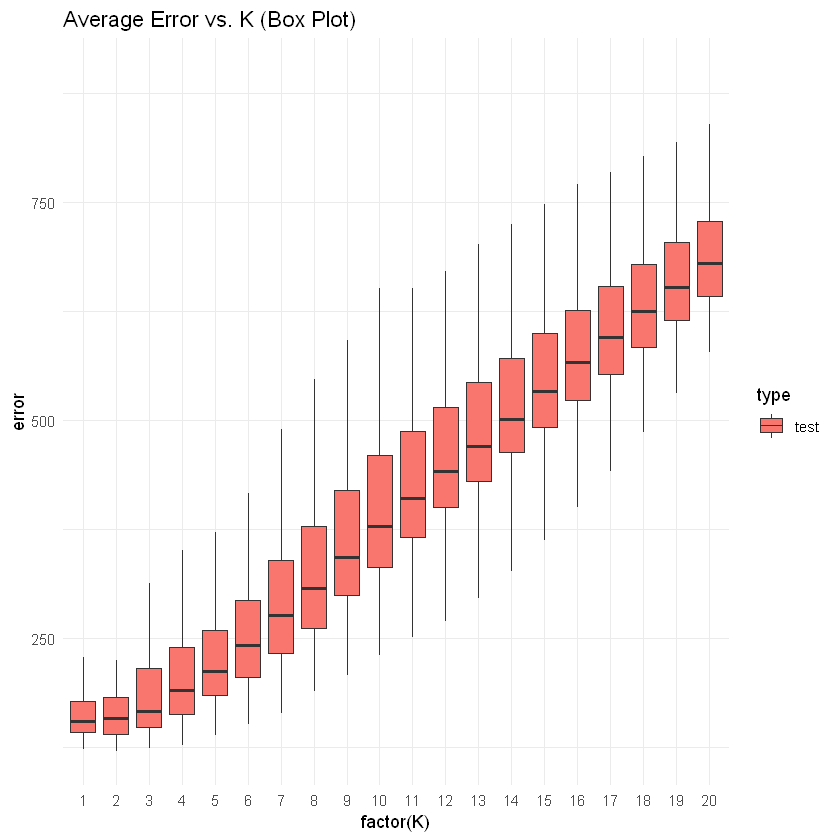

In [8]:
# plot Average Error vs. K (Box Plot)
error.m <- melt(error, id=c('K', 'L')) # reshape for visualization
names(error.m) <- c('K', 'L', 'type', 'error')

ggplot(data=error.m[error.m$type=='test',], aes(factor(K), error,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Average Error vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

##### Test error and its uncertainty vs K

From the box plot, it can be seen that as the value of K increases the test error increase and its uncertainty also increases. Further, when K becomes high, the uncertainty around the error starts to decrease but the test error continues to increase.

### Bootstrapping for KNN regression with K=10 (the neighbourhood size), size = 30 (the size of each subset), and change times = 10, 20, 30,.., 200 (the number of subsets)

In [9]:
K <- 10           # Maximum K for KNN 
N <- 30          # size of datasets


# times = 10, 20, 30,.., 200 (the number of subsets)

times.avgError <- data.frame()

for(L in seq(from=10, to=200, by=10)) # for times = 10, 20, 30,.., 200
{
  boot.indx <- boot(nrow(train.data), N, L)
  
    for (l in 1:L){
    
    #### calculate iteration index i
    i <- (10-1)*L+l
    
    #### save sample indices that were selected by bootstrap
    indx <- boot.indx[l,]
    
    #### save the value of k and l
    times.avgError[i,'K'] <- 10
    times.avgError[i,'L'] <- L
    
    #### calculate and record errors
    times.avgError[i,'test'] <-  sqrt(mean((knn(train.data[indx, ], train.label[indx], test.data, K=k) - test.label)^2))
    
  }
    
}


### Visualization: Test error and its uncertainty behave Vs Number of subsets in bootstrapping

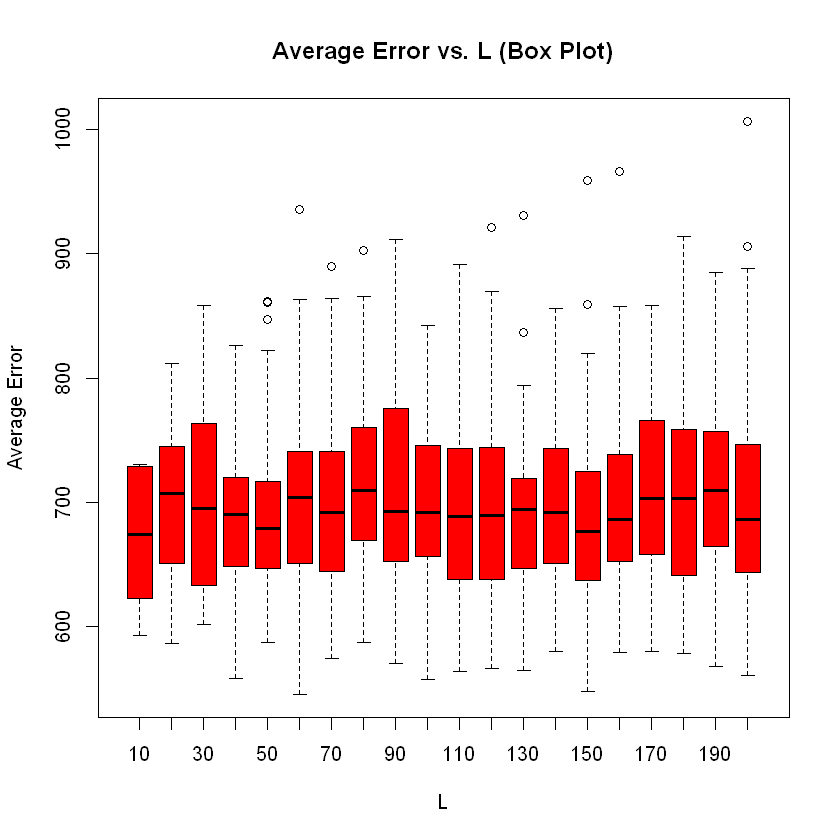

In [10]:
# Test error and its uncertainty behave Vs Number of subsets in bootstrapping:

times.avgError.m <- melt(times.avgError, id=c('K', 'L')) # reshape for visualization
names(times.avgError.m) <- c('K', 'L', 'type', 'times.avgError')

boxplot(times.avgError~L, times.avgError.m, main="Average Error vs. L (Box Plot)", 
        xlab="L", ylab="Average Error", col = "Red")

##### Test error and its uncertainty behave Vs Number of subsets in bootstrapping

From the box plot above, it can be seen that number of subsets in bootstrapping doesn’t have much effect on the error. The error tends be different for different sizes of subsets, but the distribution seems random.